# Building Handwritten Digit Classifier

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['DESCR', 'data', 'target', 'target_names', 'images'])

In [3]:
features = pd.DataFrame(digits['data'])
labels = pd.DataFrame(digits['target'])
print(features.info(),labels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
0     1797 non-null float64
1     1797 non-null float64
2     1797 non-null float64
3     1797 non-null float64
4     1797 non-null float64
5     1797 non-null float64
6     1797 non-null float64
7     1797 non-null float64
8     1797 non-null float64
9     1797 non-null float64
10    1797 non-null float64
11    1797 non-null float64
12    1797 non-null float64
13    1797 non-null float64
14    1797 non-null float64
15    1797 non-null float64
16    1797 non-null float64
17    1797 non-null float64
18    1797 non-null float64
19    1797 non-null float64
20    1797 non-null float64
21    1797 non-null float64
22    1797 non-null float64
23    1797 non-null float64
24    1797 non-null float64
25    1797 non-null float64
26    1797 non-null float64
27    1797 non-null float64
28    1797 non-null float64
29    1797 non-null float64
30    1797 non-null float64
31    1797 non-null float

In the train features there are 1797 images, stored in 64 columns of data  for the 8 by 8 pixel images.

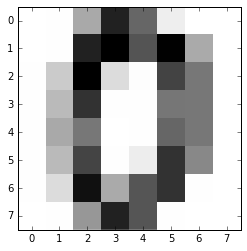

In [4]:
first_image = features.iloc[0]
#first_image = first_image.drop('label',axis = 1)
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r',interpolation='none') #had to add interpolation none because was blurry without

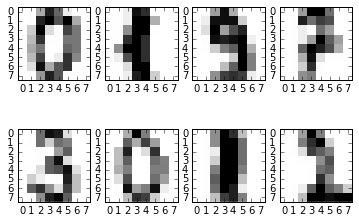

In [5]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(features.iloc[0].values.reshape(8,8), cmap='gray_r',interpolation='none')
axarr[0, 1].imshow(features.iloc[99].values.reshape(8,8), cmap='gray_r',interpolation='none')
axarr[0, 2].imshow(features.iloc[199].values.reshape(8,8), cmap='gray_r',interpolation='none')
axarr[0, 3].imshow(features.iloc[299].values.reshape(8,8), cmap='gray_r',interpolation='none')

axarr[1, 0].imshow(features.iloc[999].values.reshape(8,8), cmap='gray_r',interpolation='none')
axarr[1, 1].imshow(features.iloc[1099].values.reshape(8,8), cmap='gray_r',interpolation='none')
axarr[1, 2].imshow(features.iloc[1199].values.reshape(8,8), cmap='gray_r',interpolation='none')
axarr[1, 3].imshow(features.iloc[1299].values.reshape(8,8), cmap='gray_r',interpolation='none')

### Splitting Data into Testing/Training

In [6]:
split_index = int(len(features)*.5)
train_features = features[:split_index]
train_labels = labels[:split_index]

test_features = features[split_index:]
test_labels = labels[split_index:]

# knn = KNeighborsClassifier(n_neighbors = 5)
# knn.fit(train_features, train_labels)

### K-Nearest Neighbors Model

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# 50% Train / test validation
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels.values.ravel())
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

# this is not working for some reason
def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(features):
        train_features = features.loc[train_index]
        test_features = features.loc[test_index]
        train_labels = labels.loc[train_index]
        test_labels = labels.loc[test_index].values.ravel()
        
        model = train_knn(k, train_features, train_labels)
        
        overall_accuracy = test(model, test_features, test_labels)
        
        fold_accuracies.append(overall_accuracy)
    
    return fold_accuracies
        
knn_one_accuracies = cross_validate(1)

In [8]:
knn_one_accuracies

[0.9688888888888889,
 0.9599109131403119,
 0.9799554565701559,
 0.9621380846325167]

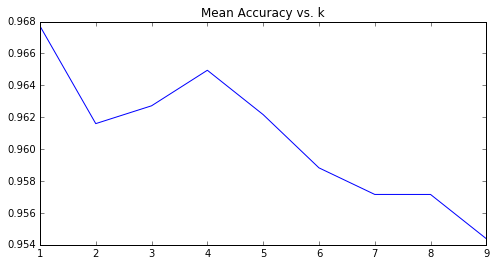

In [9]:
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)

### Neural Network with One Hidden Layer

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

# 50% Train / test validation
def train_nn(n, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes=n,activation='relu')
    nn.fit(train_features, train_labels.values.ravel())
    return nn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy


def cross_validate(n):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(features):
        train_features = features.loc[train_index]
        test_features = features.loc[test_index]
        train_labels = labels.loc[train_index]
        test_labels = labels.loc[test_index].values.ravel()
        
        model = train_nn(n, train_features, train_labels)
        
        overall_accuracy = test(model, test_features, test_labels)
        
        fold_accuracies.append(overall_accuracy)
    
    return fold_accuracies



In [11]:
nn_one_accuracies = cross_validate((1,))
print(nn_one_accuracies)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



[0.26, 0.19599109131403117, 0.22939866369710468, 0.2717149220489978]


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



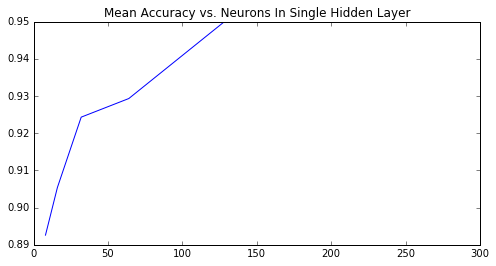

In [12]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

### Summary:
It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately **89% to approximately 96%.** Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately **96%** accuracy, there may not be any advantage to using a single hidden layer neural network for this problem.

## Neural Network with Two Hidden Layers

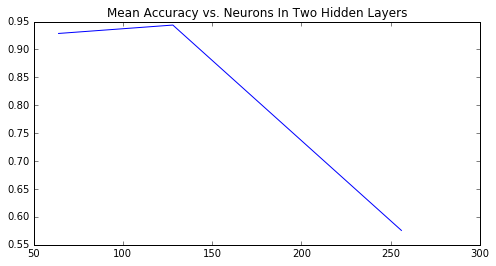

In [13]:
nn_two_neurons = [
    (64,64),
    (128,128),
    (256,256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

In [14]:
nn_two_accuracies

[0.928757733234348, 0.9437973273942094, 0.5757535263548627]

### Summary
Using 2 hidden layers improved our simple accuracy to 95%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

## Neural Network with 3 Hidden Layers
Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

# 50% Train / test validation
def train_nn(n, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes=n,activation='relu')
    nn.fit(train_features, train_labels.values.ravel())
    return nn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy


def cross_validate_six(n):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2)
    for train_index, test_index in kf.split(features):
        train_features = features.loc[train_index]
        test_features = features.loc[test_index]
        train_labels = labels.loc[train_index]
        test_labels = labels.loc[test_index].values.ravel()
        
        model = train_nn(n, train_features, train_labels)
        
        overall_accuracy = test(model, test_features, test_labels)
        
        fold_accuracies.append(overall_accuracy)
    
    return fold_accuracies


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



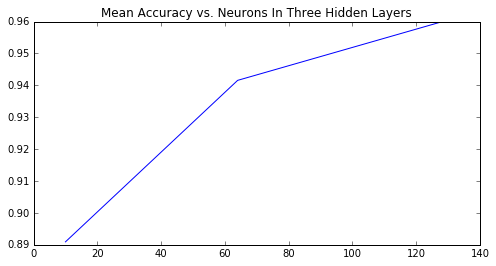

In [16]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate_six(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

In [17]:
nn_three_accuracies

[0.8909253065774805, 0.941571906354515, 0.9599349684132292]

Summary
Using 3 hidden layers improved our simple accuracy to 96%, even with 6-fold cross validation. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance.